<h1>Regression tasks with PyTorch<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dataset-with-clear-borders" data-toc-modified-id="Dataset-with-clear-borders-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Dataset with clear borders</a></span></li><li><span><a href="#Dataset-with-blur-borders" data-toc-modified-id="Dataset-with-blur-borders-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Dataset with blur borders</a></span></li></ul></li></ul></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data transformation</a></span></li><li><span><a href="#Dataset-creation" data-toc-modified-id="Dataset-creation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset creation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Regression-with-clear-borders" data-toc-modified-id="Regression-with-clear-borders-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Regression with clear borders</a></span></li><li><span><a href="#Model-evaluation-with-test-data" data-toc-modified-id="Model-evaluation-with-test-data-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Model evaluation with test data</a></span></li><li><span><a href="#Regression-with-blur-border" data-toc-modified-id="Regression-with-blur-border-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Regression with blur border</a></span></li><li><span><a href="#Model-evaluation-with-test-data-(blur-border_dataset)" data-toc-modified-id="Model-evaluation-with-test-data-(blur-border_dataset)-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Model evaluation with test data (blur border_dataset)</a></span></li><li><span><a href="#Additional-model-(reg_model)-training-with-blur-border-(model-pre-trained,-no-frozen-pre-trained-parameters)" data-toc-modified-id="Additional-model-(reg_model)-training-with-blur-border-(model-pre-trained,-no-frozen-pre-trained-parameters)-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Additional model (reg_model) training with blur border (model pre-trained, no frozen pre-trained parameters)</a></span></li><li><span><a href="#Additional-model-(reg_model)-training-with-blur-border-(model-pre-trained,-frozen-pre-trained-parameters)" data-toc-modified-id="Additional-model-(reg_model)-training-with-blur-border-(model-pre-trained,-frozen-pre-trained-parameters)-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Additional model (reg_model) training with blur border (model pre-trained, frozen pre-trained parameters)</a></span></li><li><span><a href="#Finetuning" data-toc-modified-id="Finetuning-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>Finetuning</a></span></li></ul></li></ul></li></ul></div>

In [76]:
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision.transforms import v2

import os
import matplotlib.pyplot as plt
import numpy as np

import json
from tqdm import tqdm
from PIL import Image

import struct
import sys
from array import array
from os import path

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [77]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

## Data preparation

#### Dataset with clear borders

In [78]:
if not os.path.isdir('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/dataset'):
    os.mkdir('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/dataset')

img = np.random.randint(0, 50, [10000, 64, 64], dtype=np.uint8)
square = np.random.randint(100, 200, [10000, 15, 15], dtype=np.uint8)

coords = np.empty([100000, 2])

data = {}

for i in range(img.shape[0]):
    x = np.random.randint(20, 44)
    y = np.random.randint(20, 44)
    
    img[i, (y - 7):(y + 8), (x - 7):(x + 8)] = square[i]
    coords[i] = (x, y)
    
    name_img = f'img_{i}.jpeg'
    path_img = os.path.join('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/dataset/', name_img)
    
    image = Image.fromarray(img[i])
    image.save(path_img)
    
    data[name_img] = [y, x]
    
with open('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/dataset/coords.json', 'w')  as f:
    json.dump(data, f, indent=2)

#### Dataset with blur borders

In [79]:
if not os.path.isdir('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/dataset'):
    os.mkdir('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/dataset')

img = np.random.randint(70, 150, [10000, 64, 64], dtype=np.uint8)
square = np.random.randint(100, 200, [10000, 15, 15], dtype=np.uint8)
'''
for i in range(square.shape[0]):
    square[i] = np.pad(square[i][1:-1,1:-1],
                       pad_width=((1, 1), (1, 1)),
                       mode='constant',
                       constant_values=20
                      )
'''

coords = np.empty([100000, 2])

data = {}

for i in range(img.shape[0]):
    x = np.random.randint(20, 44)
    y = np.random.randint(20, 44)
    
    img[i, (y - 7):(y + 8), (x - 7):(x + 8)] = square[i]
    coords[i] = (x, y)
    
    name_img = f'img_{i}.jpeg'
    path_img = os.path.join('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/dataset/', name_img)
    
    image = Image.fromarray(img[i])
    image.save(path_img)
    
    data[name_img] = [y, x]
    
with open('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/dataset/coords.json', 'w')  as f:
    json.dump(data, f, indent=2)

## Data transformation

In [80]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5,), std=(0.5,))
])

## Dataset creation

In [81]:
class DatasetReg(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')
            
        self.len_dataset = len(self.list_name_file)
        
        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)
    
    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)

        img = Image.open(path_img)
        coord = torch.tensor(self.dict_coords[name_file], dtype=torch.float32)
        
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img, coord    

#### Regression with clear borders

In [82]:
dataset_reg = DatasetReg('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/dataset',
                        transform=transform)

In [83]:
img, coord = dataset_reg[1204]

Coord: tensor([34., 20.])


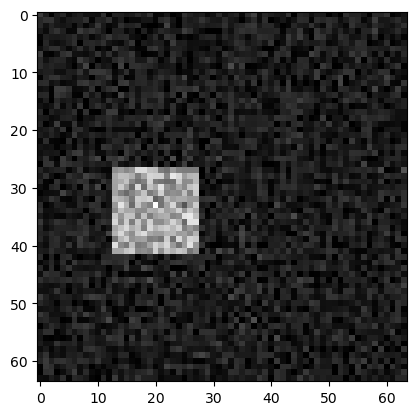

In [84]:
print(f'Coord: {coord}')
      
plt.imshow(img.numpy()[0], cmap='gray');

In [85]:
train_set, val_set, test_set = random_split(dataset_reg, [0.7, 0.1, 0.2])

In [86]:
train_loader_reg = DataLoader(train_set, batch_size=16, shuffle=True)
val_loader_reg = DataLoader(val_set, batch_size=16, shuffle=False)
test_loader_reg = DataLoader(test_set, batch_size=16, shuffle=False)

In [87]:
imgs, cords = next(iter(train_loader_reg))

print('Image:')
print(f'Img type: {type(imgs)}')
print(f'Data shape: {imgs.shape}')
print(f'Data type: {imgs.dtype}')

print('Coords:')
print(f'Coords type: {type(cords)}')
print(f'Coords shape: {cords.shape}')
print(f'Coords data type: {cords.dtype}')

Image:
Img type: <class 'torch.Tensor'>
Data shape: torch.Size([16, 1, 64, 64])
Data type: torch.float32
Coords:
Coords type: <class 'torch.Tensor'>
Coords shape: torch.Size([16, 2])
Coords data type: torch.float32


In [228]:
class MyModelReg(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(inp, 32, (3, 3), bias=True),
#            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3, 3), bias=True),
#            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        
        self.flatten = nn.Flatten()
        
        self.fc = nn.Sequential(
            nn.Linear(64*60*60, 128),
            nn.ReLU(),
#            nn.Dropout(0.5),
            nn.Linear(128, out)
        )
    
    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        output = self.fc(x)
        return output

In [89]:
class EarlyStopping:
    def __init__(self, mode='min', patience=10, threshold=0.0001, threshold_mode='rel'):
        if mode not in {'min', 'max'}:
            raise ValueError(f'Please select from min or max')
        if threshold_mode not in {'rel', 'abs'}:
            raise ValueError(f'Please select from rel or abs')
        if not isinstance(patience, int):
            raise TypeError(f'Please select int datatype')
        if not isinstance(threshold, float):
            raise TypeError(f'Please select float datatype')
        if threshold >= 1.0:
            raise ValueError(f'Please select threshold less 1.0')
        
        self.mode = mode
        self.patience = patience
        self.threshold = threshold
        self.threshold_mode = threshold_mode
        self.count = 0
        self.best = None
        
    def __call__(self, tracked_parameter):
        current = float(tracked_parameter)
        if self.best == None:
            self.best = current
            return False
        
        if self.changed_better(current, self.best):
            self.best = current
            self.count = 0
        else:
            self.count += 1
            
        if self.count >= self.patience:
            self.count = 0
            return True
        return False
    
    def changed_better(self, current, best):
        if self.mode == 'min' and self.threshold_mode == 'rel':
            return current < best - best * self.threshold
        
        elif self.mode == 'min' and self.threshold_mode == 'abs':
            return current < best - self.threshold
        
        elif self.mode == 'max' and self.threshold_mode == 'rel':
            return current > best + best * self.threshold
        
        else:
            return current > best + self.threshold

In [92]:
model_reg = MyModelReg(1, 2).to(device)

In [93]:
inp = torch.rand([16, 1, 64, 64], dtype=torch.float32).to(device)

In [94]:
test = model_reg(inp)
test.shape

torch.Size([16, 2])

In [95]:
loss_reg = nn.MSELoss()
opt_reg = torch.optim.Adam(model_reg.parameters(), lr=0.0001)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_reg,
#                                                        mode='min',
#                                                        factor=0.1,
                                                        patience=5,
#                                                        threshold=0.0001,
#                                                        threshold_mode='rel',
#                                                        cooldown=0,
#                                                        min_lr=0,
#                                                       eps=1e-08
                                                       )

earlystopping = EarlyStopping(mode='min', patience=10)

In [96]:
EPOCHS = 5
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None
#count = 0

In [97]:
for epoch in range(1, EPOCHS+1):
    
    model_reg.train()
    running_train_loss = []
    true_answer = 0
    
    train_loop = tqdm(train_loader_reg, leave=False)
    for x, targets in train_loop:
#       x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)
        
        targets = targets.to(device)
        
        pred = model_reg(x)
        loss = loss_reg(pred, targets)
        
        opt_reg.zero_grad()
        loss.backward()
        
        opt_reg.step()
        
        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)
        
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        train_loop.set_description(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f}')
    
    running_train_acc = true_answer / len(train_set)
    
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)
    
    model_reg.eval()
    with torch.no_grad():
        running_val_loss = []
        true_answer = 0
        
        for x, targets in val_loader_reg:
#            x = x.reshape(-1, 64*64).to(device)
            x = x.to(device)
            
            targets = targets.to(device)
            
            pred = model_reg(x)
            loss = loss_reg(pred, targets)
            
            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            
            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
        running_val_acc = true_answer / len(val_set)
        
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)
        
        
    
    lr_scheduler.step(mean_val_loss)
    lr = lr_scheduler._last_lr[0]
    lr_list.append(lr)
    
    if epoch == 1 or epoch % 5 == 0:
        print(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f},'
              f'train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f},'
              f'val_acc={running_val_acc:.4f}, lr={lr:.4f}'
             )
        
    if best_loss == None:
        best_loss = mean_val_loss
        
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        
        checkpoint = {
            'state_model': model_reg.state_dict(),
            'state_opt': opt_reg.state_dict(),
            'state_lr_scheduler': lr_scheduler.state_dict(),
            'loss': {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'best_loss': best_loss
            },
            'metric': {
                'train_acc': train_acc,
                'val_acc': val_acc
            },
            'lr': lr_list,
            'epoch': {
                'EPOCHS': EPOCHS,
                'save_epoch': epoch
            }
        }
        
        torch.save(checkpoint,
                   f'/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/models_saved/model_state_dict_epoch_{epoch}.pt')
        print(f'On epoch {epoch},'
              f' model was saved with validation los function data: {mean_val_loss:.4f}', end='\n\n')
    
    if earlystopping(mean_val_loss):
        print(f'\33[31mTraining was stopped on {epoch+1} epoch\033[0m')
        break

    
    

Epoch [1 / 5], train_loss=15.9228,train_acc=0.5890, val_loss=0.0511,val_acc=0.9390, lr=0.0001


On epoch 2, model was saved with validation los function data: 0.0361



On epoch 4, model was saved with validation los function data: 0.0285



Epoch [5 / 5], train_loss=0.0312,train_acc=0.9827, val_loss=0.0306,val_acc=0.9870, lr=0.0001


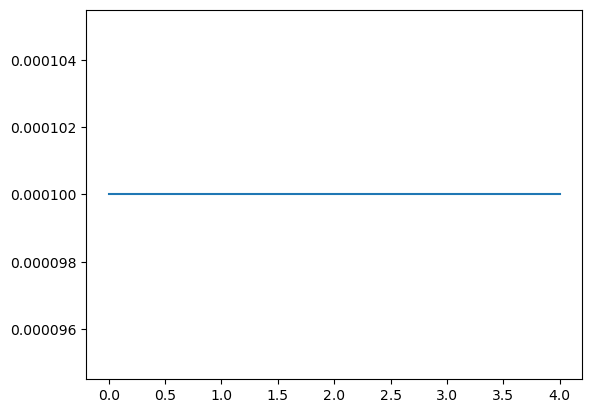

In [98]:
plt.plot(lr_list)
plt.show()

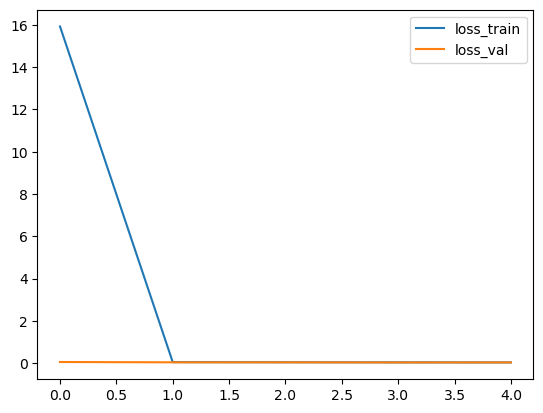

In [99]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss_train', 'loss_val'])
plt.show()

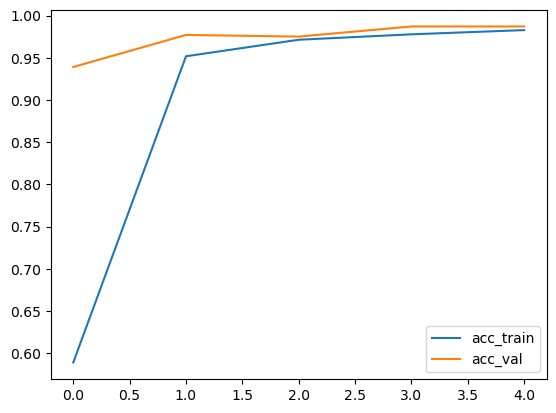

In [100]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['acc_train', 'acc_val'])
plt.show()

#### Model evaluation with test data

In [101]:
checkpoint = torch.load(
    '/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/models_saved/model_state_dict_epoch_4.pt',
    map_location=device,
    weights_only=True)
model_reg.load_state_dict(checkpoint['state_model'])

<All keys matched successfully>

In [102]:
model_reg.eval()
with torch.no_grad():
    running_test_loss = []
    true_answer = 0
        
    for x, targets in test_loader_reg:
#        x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)
            
        targets = targets.to(device)
            
        pred = model_reg(x)
        loss = loss_reg(pred, targets)
            
        running_test_loss.append(loss.item())
        mean_test_loss = sum(running_test_loss) / len(running_test_loss)
            
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
    running_test_acc = true_answer / len(test_set)
        
print(f'test_losqs={mean_test_loss:.4f},'
      f'test_acc={running_test_acc:.4f}', end='\n\n')

test_losqs=0.0292,test_acc=0.9860



Pred coord:        tensor([39.8386, 32.0921], device='mps:0', grad_fn=<SelectBackward0>)
Pred round-coord:  tensor([40., 32.], device='mps:0', grad_fn=<RoundBackward0>)
True coord:        tensor([40., 32.])


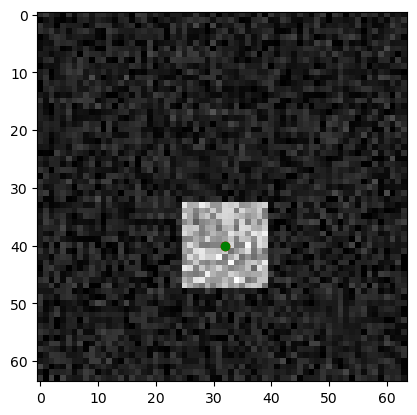

In [103]:
img, coord = test_set[500]

model_reg.eval()

pred = model_reg(torch.unsqueeze(img, 0).to(device)).to(device)

x_pred = torch.round(pred[0])[1].item()
y_pred = torch.round(pred[0])[0].item()

print(f'Pred coord:        {pred[0]}')
print(f'\033[31mPred round-coord: \033[0m {torch.round(pred[0])}')
print(f'\033[32mTrue coord: \033[0m       {coord}')

plt.imshow(img[0].numpy(), cmap='gray')
plt.plot(x_pred, y_pred, marker='o', color='red')
plt.plot(coord[1].item(), coord[0].item(), marker='o', color='green')

In [105]:
model_reg.eval()

test_loader_reg = DataLoader(test_set, batch_size=2000)

x, targets = next(iter(test_loader_reg))

print(x.shape)
print(targets.shape)

torch.Size([2000, 1, 64, 64])
torch.Size([2000, 2])


In [106]:
pred = model_reg(x.to(device))

index = (torch.round(pred) == targets.to(device)).all(dim=1)
print(f'From {len(test_set)} \033[32mcorrect predicted {index.sum()}', end='\n\n')

imgs_correct_pred = x.to(device)[index]
correct_pred = pred[index]
rel_correct_pred = targets.to(device)[index]

From 2000 correct predicted 1972



In [107]:
pred = model_reg(x.to(device))

index = ~(torch.round(pred) == targets.to(device)).all(dim=1)
print(f'From {len(test_set)} \033[31mincorrect predicted {index.sum()}', end='\n\n')

imgs_false_pred = x.to(device)[index]
false_pred = pred[index]
rel_false_pred = targets.to(device)[index]

From 2000 incorrect predicted 28



Pred coord:        tensor([40.4488, 37.5571], device='mps:0', grad_fn=<SelectBackward0>)
Pred round-coord:  tensor([40., 38.], device='mps:0', grad_fn=<RoundBackward0>)
True coord:        tensor([41., 38.], device='mps:0')


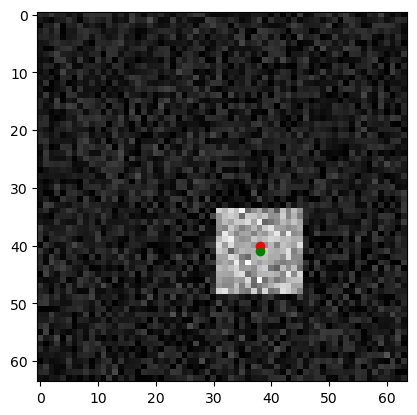

In [108]:
index_false_pred = 22
false_coords = false_pred[index_false_pred]
rel_coords = rel_false_pred[index_false_pred]

print(f'Pred coord:        {false_coords}')
print(f'\033[31mPred round-coord: \033[0m {torch.round(false_coords)}')
print(f'\033[32mTrue coord: \033[0m       {rel_coords}')

x_pred = torch.round(false_coords)[1].item()
y_pred = torch.round(false_coords)[0].item()

plt.imshow(imgs_false_pred[index_false_pred][0].to(device='cpu').numpy(), cmap='gray')
plt.plot(x_pred, y_pred, marker='o', color='red')
plt.plot(rel_coords[1].item(), rel_coords[0].item(), marker='o', color='green')

#### Regression with blur border

In [229]:
dataset_reg_border = DatasetReg('/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/dataset',
                        transform=transform)

Coord: tensor([22., 36.])


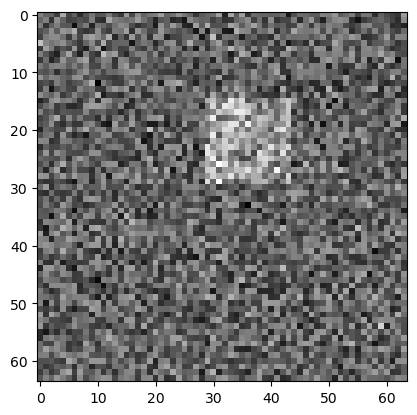

In [230]:
img, coord = dataset_reg_border[1204]
print(f'Coord: {coord}')
      
plt.imshow(img.numpy()[0], cmap='gray');

In [231]:
train_set_border, val_set_border, test_set_border = random_split(dataset_reg_border, [0.7, 0.1, 0.2])

In [232]:
train_loader_reg_border = DataLoader(train_set_border, batch_size=16, shuffle=True)
val_loader_reg_border = DataLoader(val_set_border, batch_size=16, shuffle=False)
test_loader_reg_border = DataLoader(test_set_border, batch_size=16, shuffle=False)

In [233]:
imgs, cords = next(iter(train_loader_reg_border))

print('Image:')
print(f'Img type: {type(imgs)}')
print(f'Data shape: {imgs.shape}')
print(f'Data type: {imgs.dtype}')

print('Coords:')
print(f'Coords type: {type(cords)}')
print(f'Coords shape: {cords.shape}')
print(f'Coords data type: {cords.dtype}')

Image:
Img type: <class 'torch.Tensor'>
Data shape: torch.Size([16, 1, 64, 64])
Data type: torch.float32
Coords:
Coords type: <class 'torch.Tensor'>
Coords shape: torch.Size([16, 2])
Coords data type: torch.float32


In [234]:
model_reg_border = MyModelReg(1, 2).to(device)

In [235]:
inp = torch.rand([16, 1, 64, 64], dtype=torch.float32).to(device)
test = model_reg(inp)
test.shape

torch.Size([16, 2])

In [236]:
loss_reg = nn.MSELoss()
opt_reg_border = torch.optim.Adam(model_reg_border.parameters(), lr=0.001)
lr_scheduler_border = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_reg_border, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

In [237]:
EPOCHS = 50
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None
#count = 0

In [238]:
for epoch in range(1, EPOCHS+1):
    
    model_reg_border.train()
    running_train_loss = []
    true_answer = 0
    
    train_loop = tqdm(train_loader_reg_border, leave=False)
    for x, targets in train_loop:
#        x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)
        targets = targets.to(device)
        
        pred = model_reg_border(x)
        loss = loss_reg(pred, targets)
        
        opt_reg_border.zero_grad()
        loss.backward()
        
        opt_reg_border.step()
        
        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)
        
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        train_loop.set_description(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f}')
    
    running_train_acc = true_answer / len(train_set_border)
    
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)
    
    model_reg_border.eval()
    with torch.no_grad():
        running_val_loss = []
        true_answer = 0
        
        for x, targets in val_loader_reg_border:
#            x = x.reshape(-1, 64*64).to(device)
            x = x.to(device)
            targets = targets.to(device)
            
            pred = model_reg_border(x)
            loss = loss_reg(pred, targets)
            
            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            
            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
        running_val_acc = true_answer / len(val_set_border)
        
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)
        
        
    
    lr_scheduler_border.step(mean_val_loss)
    lr = lr_scheduler_border._last_lr[0]
    lr_list.append(lr)
    
    if epoch == 1 or epoch % 5 == 0:
        print(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f},'
              f'train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f},'
              f'val_acc={running_val_acc:.4f}, lr={lr:.4f}'
             )
    
    if best_loss == None:
        best_loss = mean_val_loss
        
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        
        checkpoint = {
            'state_model': model_reg_border.state_dict(),
            'state_opt': opt_reg_border.state_dict(),
            'state_lr_scheduler': lr_scheduler_border.state_dict(),
            'loss': {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'best_loss': best_loss
            },
            'metric': {
                'train_acc': train_acc,
                'val_acc': val_acc
            },
            'lr': lr_list,
            'epoch': {
                'EPOCHS': EPOCHS,
                'save_epoch': epoch
            }
        }
        
        torch.save(checkpoint,
                   f'/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/models_saved/modelb_state_dict_epoch_{epoch}.pt')
        print(f'On epoch {epoch},'
              f'model was saved with validation los function data: {mean_val_loss:.4f}', end='\n\n')
    
    if earlystopping(mean_val_loss):
        print(f'\33[31mTraining was stopped on {epoch+1} epoch\033[0m')
        break

Epoch [1 / 50], train_loss=12.7462,train_acc=0.2174, val_loss=0.5833,val_acc=0.2310, lr=0.0010


On epoch 2,model was saved with validation los function data: 0.3166



Epoch [5 / 50], train_loss=0.2746,train_acc=0.4984, val_loss=0.7974,val_acc=0.0540, lr=0.0010


On epoch 6,model was saved with validation los function data: 0.2722



On epoch 8,model was saved with validation los function data: 0.1612



Epoch [10 / 50], train_loss=0.1585,train_acc=0.6610, val_loss=0.1541,val_acc=0.6760, lr=0.0010
On epoch 10,model was saved with validation los function data: 0.1541



On epoch 14,model was saved with validation los function data: 0.1267



Epoch [15 / 50], train_loss=0.1221,train_acc=0.7554, val_loss=0.3023,val_acc=0.3840, lr=0.0010


Epoch [20 / 50], train_loss=0.1027,train_acc=0.8213, val_loss=0.1580,val_acc=0.6730, lr=0.0001


On epoch 21,model was saved with validation los function data: 0.1118



On epoch 22,model was saved with validation los function data: 0.1076



On epoch 23,model was saved with validation los function data: 0.1070



Epoch [25 / 50], train_loss=0.0123,train_acc=1.0000, val_loss=0.1113,val_acc=0.7720, lr=0.0001


On epoch 26,model was saved with validation los function data: 0.1070



Epoch [30 / 50], train_loss=0.0037,train_acc=1.0000, val_loss=0.1077,val_acc=0.7750, lr=0.0001


Epoch [35 / 50], train_loss=0.0006,train_acc=1.0000, val_loss=0.1069,val_acc=0.7830, lr=0.0000
On epoch 35,model was saved with validation los function data: 0.1069



On epoch 38,model was saved with validation los function data: 0.1069



Epoch [40 / 50], train_loss=0.0003,train_acc=1.0000, val_loss=0.1070,val_acc=0.7780, lr=0.0000


On epoch 44,model was saved with validation los function data: 0.1068



Epoch [45 / 50], train_loss=0.0001,train_acc=1.0000, val_loss=0.1069,val_acc=0.7790, lr=0.0000


Epoch [50 / 50], train_loss=0.0000,train_acc=1.0000, val_loss=0.1069,val_acc=0.7830, lr=0.0000


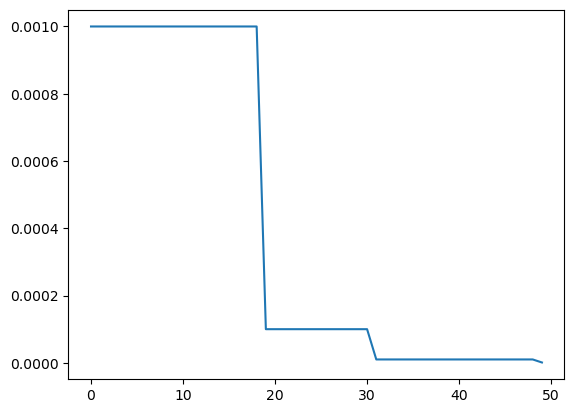

In [239]:
plt.plot(lr_list)
plt.show()

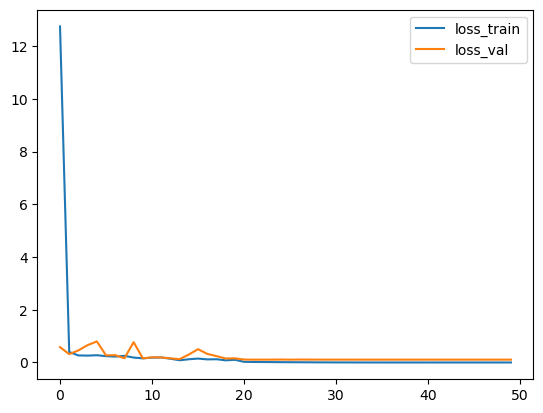

In [240]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss_train', 'loss_val'])
plt.show()

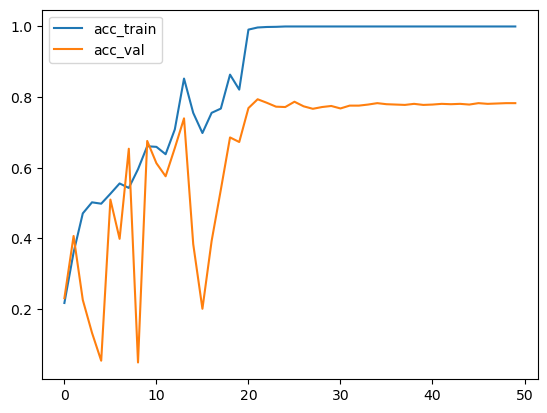

In [241]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['acc_train', 'acc_val'])
plt.show()

#### Model evaluation with test data (blur border_dataset)

In [242]:
checkpoint_board = torch.load(
    '/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/models_saved/modelb_state_dict_epoch_44.pt',
    weights_only=True)
model_reg_border.load_state_dict(checkpoint_board['state_model'])

<All keys matched successfully>

In [243]:
model_reg_border.eval()
with torch.no_grad():
    running_test_loss = []
    true_answer = 0
        
    for x, targets in test_loader_reg_border:
#        x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)   
        targets = targets.to(device)
            
        pred = model_reg_border(x)
        loss = loss_reg(pred, targets)
            
        running_test_loss.append(loss.item())
        mean_test_loss = sum(running_test_loss) / len(running_test_loss)
            
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
    running_test_acc = true_answer / len(test_set_border)
        
print(f'test_loss={mean_test_loss:.4f},'
      f'test_acc={running_test_acc:.4f}', end='\n\n')

test_loss=0.1134,test_acc=0.7630



Pred coord:        tensor([35.6110, 25.4037], device='mps:0', grad_fn=<SelectBackward0>)
Pred round-coord:  tensor([36., 25.], device='mps:0', grad_fn=<RoundBackward0>)
True coord:        tensor([36., 25.])


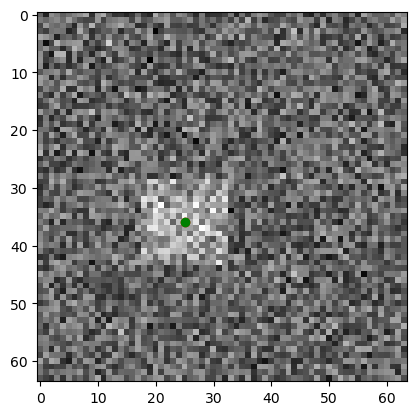

In [244]:
img, coord = test_set_border[1000]

model_reg_border.eval()

pred = model_reg_border(torch.unsqueeze(img, 0).to(device)).to(device)

x_pred = torch.round(pred[0])[1].item()
y_pred = torch.round(pred[0])[0].item()

print(f'Pred coord:        {pred[0]}')
print(f'\033[31mPred round-coord: \033[0m {torch.round(pred[0])}')
print(f'\033[32mTrue coord: \033[0m       {coord}')

plt.imshow(img[0].numpy(), cmap='gray')
plt.plot(x_pred, y_pred, marker='o', color='red')
plt.plot(coord[1].item(), coord[0].item(), marker='o', color='green')

In [245]:
model_reg_border.eval()

test_loader_reg_border = DataLoader(test_set_border, batch_size=2000, shuffle=False)

x, targets = next(iter(test_loader_reg_border))

print(x.shape)
print(targets.shape)

torch.Size([2000, 1, 64, 64])
torch.Size([2000, 2])


In [246]:
pred = model_reg_border(x.to(device))

index = ~(torch.round(pred) == targets.to(device)).all(dim=1)
print(f'From {len(test_set)} \033[31mincorrect predicted {index.sum()}', end='\n\n')

imgs_false_pred = x.to(device)[index]
false_pred = pred[index]
rel_false_pred = targets.to(device)[index]

From 2000 incorrect predicted 474



Pred coord:        tensor([37.8831, 32.7091], device='mps:0', grad_fn=<SelectBackward0>)
Pred round-coord:  tensor([38., 33.], device='mps:0', grad_fn=<RoundBackward0>)
True coord:        tensor([38., 32.], device='mps:0')


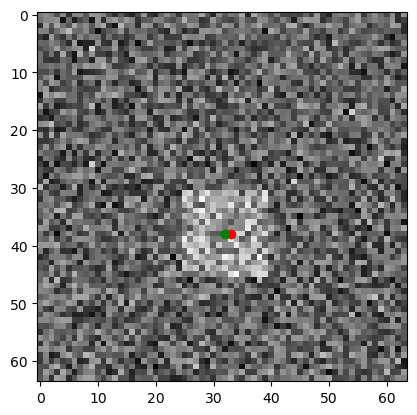

In [247]:
index_false_pred = 450
false_coords = false_pred[index_false_pred]
rel_coords = rel_false_pred[index_false_pred]

print(f'Pred coord:        {false_coords}')
print(f'\033[31mPred round-coord: \033[0m {torch.round(false_coords)}')
print(f'\033[32mTrue coord: \033[0m       {rel_coords}')

x_pred = torch.round(false_coords)[1].item()
y_pred = torch.round(false_coords)[0].item()

plt.imshow(imgs_false_pred[index_false_pred][0].to(device='cpu').numpy(), cmap='gray')
plt.plot(x_pred, y_pred, marker='o', color='red')
plt.plot(rel_coords[1].item(), rel_coords[0].item(), marker='o', color='green')

#### Additional model (reg_model) training with blur border (model pre-trained, no frozen pre-trained parameters)

In [248]:
param_model = torch.load(
    '/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/models_saved/model_state_dict_epoch_4.pt',
    map_location=device,
    weights_only=True)

In [249]:
new_model = MyModelReg(1, 2).to(device)

In [250]:
new_model.load_state_dict(param_model['state_model'])

<All keys matched successfully>

In [251]:
new_model

MyModelReg(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=230400, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [252]:
loss_reg = nn.MSELoss()
opt_new = torch.optim.Adam(new_model.parameters(), lr=0.001)
lr_scheduler_new = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_new, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

In [253]:
EPOCHS = 50
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None

In [254]:
for epoch in range(1, EPOCHS+1):
    
    new_model.train()
    running_train_loss = []
    true_answer = 0
    
    train_loop = tqdm(train_loader_reg_border, leave=False)
    for x, targets in train_loop:
#        x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)
        targets = targets.to(device)
        
        pred = new_model(x)
        loss = loss_reg(pred, targets)
        
        opt_new.zero_grad()
        loss.backward()
        
        opt_new.step()
        
        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)
        
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        train_loop.set_description(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f}')
    
    running_train_acc = true_answer / len(train_set_border)
    
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)
    
    new_model.eval()
    with torch.no_grad():
        running_val_loss = []
        true_answer = 0
        
        for x, targets in val_loader_reg_border:
#            x = x.reshape(-1, 64*64).to(device)
            x = x.to(device)
            targets = targets.to(device)
            
            pred = new_model(x)
            loss = loss_reg(pred, targets)
            
            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            
            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
        running_val_acc = true_answer / len(val_set_border)
        
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)
        
        
    
    lr_scheduler_new.step(mean_val_loss)
    lr = lr_scheduler_new._last_lr[0]
    lr_list.append(lr)
    
    if epoch == 1 or epoch % 5 == 0:
        print(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f},'
              f'train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f},'
              f'val_acc={running_val_acc:.4f}, lr={lr:.4f}'
             )
    
    if best_loss == None:
        best_loss = mean_val_loss
        
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        
        checkpoint = {
            'state_model': model_reg_border.state_dict(),
            'state_opt': opt_reg_border.state_dict(),
            'state_lr_scheduler': lr_scheduler_border.state_dict(),
            'loss': {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'best_loss': best_loss
            },
            'metric': {
                'train_acc': train_acc,
                'val_acc': val_acc
            },
            'lr': lr_list,
            'epoch': {
                'EPOCHS': EPOCHS,
                'save_epoch': epoch
            }
        }
        
        torch.save(checkpoint,
                   f'/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/models_saved/modelb_state_dict_epoch_{epoch}.pt')
        print(f'On epoch {epoch},'
              f'model was saved with validation los function data: {mean_val_loss:.4f}', end='\n\n')
    
    if earlystopping(mean_val_loss):
        print(f'\33[31mTraining was stopped on {epoch+1} epoch\033[0m')
        break

Epoch [1 / 50], train_loss=10.4751,train_acc=0.2369, val_loss=0.5192,val_acc=0.2730, lr=0.0010


On epoch 2,model was saved with validation los function data: 0.2926



On epoch 3,model was saved with validation los function data: 0.2394



On epoch 4,model was saved with validation los function data: 0.2128



Epoch [5 / 50], train_loss=0.2582,train_acc=0.4767, val_loss=0.4741,val_acc=0.2130, lr=0.0010


Epoch [10 / 50], train_loss=0.3152,train_acc=0.4794, val_loss=0.2989,val_acc=0.4120, lr=0.0001


On epoch 11,model was saved with validation los function data: 0.1447



On epoch 13,model was saved with validation los function data: 0.1407



Epoch [15 / 50], train_loss=0.0438,train_acc=0.9694, val_loss=0.1427,val_acc=0.6770, lr=0.0001


Epoch [20 / 50], train_loss=0.0159,train_acc=0.9996, val_loss=0.1416,val_acc=0.6900, lr=0.0000


Training was stopped on 24 epoch


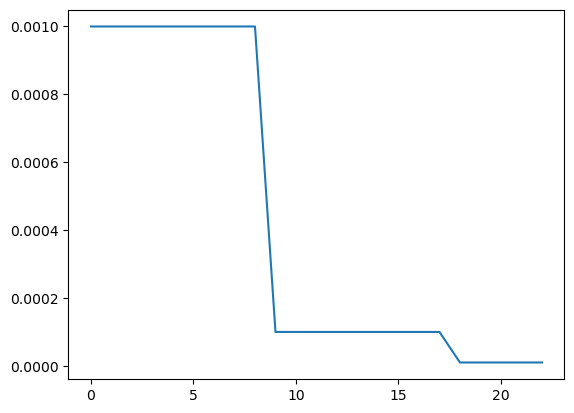

In [255]:
plt.plot(lr_list)
plt.show()

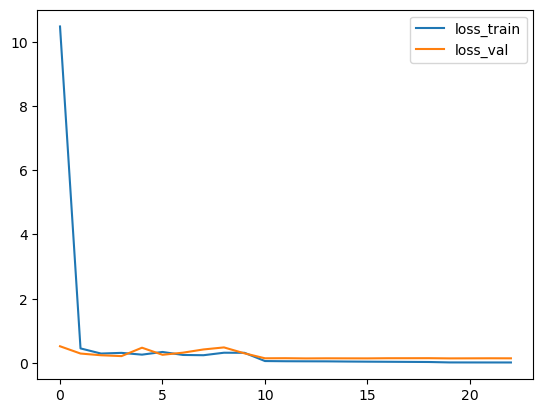

In [256]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss_train', 'loss_val'])
plt.show()

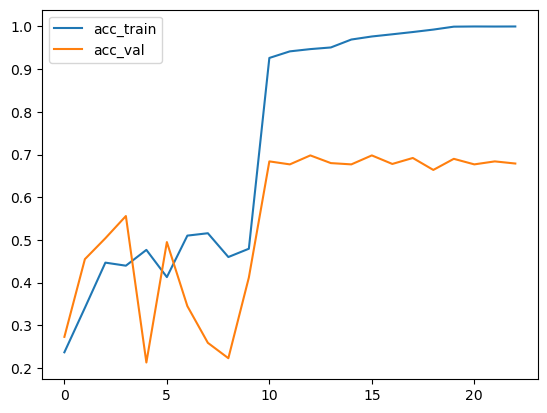

In [257]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['acc_train', 'acc_val'])
plt.show()

#### Additional model (reg_model) training with blur border (model pre-trained, frozen pre-trained parameters)

In [258]:
param_model = torch.load(
    '/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/clear_borders/models_saved/model_state_dict_epoch_4.pt',
    map_location=device,
    weights_only=True)

In [259]:
new_model_frozen = MyModelReg(1, 2).to(device)

In [260]:
new_model_frozen.load_state_dict(param_model['state_model'])

<All keys matched successfully>

In [261]:
new_model_frozen

MyModelReg(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=230400, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [263]:
for param in new_model_frozen.parameters():
    param.requires_grad = False

new_model_frozen.fc = nn.Sequential(
            nn.Linear(230400, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
new_model_frozen

MyModelReg(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=230400, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [264]:
for name, layer in new_model_frozen.named_modules():
    if isinstance(layer, (nn.Conv2d, nn.Linear)):
        print(name)
        for i, param in enumerate(layer.parameters()):
            if i == 0:
                print(f'    weights.requires_grad = {param.requires_grad}')
            else:
                print(f'    bias.requires_grad = {param.requires_grad}', end='\n\n')

conv.0
    weights.requires_grad = False
    bias.requires_grad = False

conv.2
    weights.requires_grad = False
    bias.requires_grad = False

fc.0
    weights.requires_grad = True
    bias.requires_grad = True

fc.2
    weights.requires_grad = True
    bias.requires_grad = True



In [265]:
new_model_frozen = new_model_frozen.to(device)

In [266]:
loss_reg = nn.MSELoss()
opt_frozen = torch.optim.Adam(new_model_frozen.parameters(), lr=0.001)
lr_scheduler_frozen = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_frozen, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

In [267]:
EPOCHS = 50
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None

In [268]:
for epoch in range(1, EPOCHS+1):
    
    new_model_frozen.train()
    running_train_loss = []
    true_answer = 0
    
    train_loop = tqdm(train_loader_reg_border, leave=False)
    for x, targets in train_loop:
#        x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)
        targets = targets.to(device)
        
        pred = new_model_frozen(x)
        loss = loss_reg(pred, targets)
        
        opt_frozen.zero_grad()
        loss.backward()
        
        opt_frozen.step()
        
        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)
        
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        train_loop.set_description(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f}')
    
    running_train_acc = true_answer / len(train_set_border)
    
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)
    
    new_model_frozen.eval()
    with torch.no_grad():
        running_val_loss = []
        true_answer = 0
        
        for x, targets in val_loader_reg_border:
#            x = x.reshape(-1, 64*64).to(device)
            x = x.to(device)
            targets = targets.to(device)
            
            pred = new_model_frozen(x)
            loss = loss_reg(pred, targets)
            
            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            
            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
        running_val_acc = true_answer / len(val_set_border)
        
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)
        
        
    
    lr_scheduler_frozen.step(mean_val_loss)
    lr = lr_scheduler_frozen._last_lr[0]
    lr_list.append(lr)
    
    if epoch == 1 or epoch % 5 == 0:
        print(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f},'
              f'train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f},'
              f'val_acc={running_val_acc:.4f}, lr={lr:.4f}'
             )
    
    if best_loss == None:
        best_loss = mean_val_loss
        
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        
        checkpoint = {
            'state_model': model_reg_border.state_dict(),
            'state_opt': opt_reg_border.state_dict(),
            'state_lr_scheduler': lr_scheduler_border.state_dict(),
            'loss': {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'best_loss': best_loss
            },
            'metric': {
                'train_acc': train_acc,
                'val_acc': val_acc
            },
            'lr': lr_list,
            'epoch': {
                'EPOCHS': EPOCHS,
                'save_epoch': epoch
            }
        }
        
        torch.save(checkpoint,
                   f'/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/models_saved/modelb_state_dict_epoch_{epoch}.pt')
        print(f'On epoch {epoch},'
              f'model was saved with validation los function data: {mean_val_loss:.4f}', end='\n\n')
    
    if earlystopping(mean_val_loss):
        print(f'\33[31mTraining was stopped on {epoch+1} epoch\033[0m')
        break

Epoch [1 / 50], train_loss=14.2704,train_acc=0.0584, val_loss=1.9946,val_acc=0.0660, lr=0.0010


On epoch 3,model was saved with validation los function data: 1.0694



Epoch [5 / 50], train_loss=0.9617,train_acc=0.1516, val_loss=1.4107,val_acc=0.0900, lr=0.0010


On epoch 7,model was saved with validation los function data: 1.0203



On epoch 8,model was saved with validation los function data: 0.9452



Epoch [10 / 50], train_loss=0.5481,train_acc=0.2647, val_loss=1.1463,val_acc=0.1190, lr=0.0010


On epoch 11,model was saved with validation los function data: 0.8522



On epoch 12,model was saved with validation los function data: 0.8225



Epoch [15 / 50], train_loss=0.3508,train_acc=0.3506, val_loss=0.8239,val_acc=0.1870, lr=0.0010


On epoch 16,model was saved with validation los function data: 0.7801



Epoch [20 / 50], train_loss=0.3088,train_acc=0.4323, val_loss=0.6753,val_acc=0.2250, lr=0.0010
On epoch 20,model was saved with validation los function data: 0.6753



Epoch [25 / 50], train_loss=0.2104,train_acc=0.5413, val_loss=0.7628,val_acc=0.2000, lr=0.0010


On epoch 27,model was saved with validation los function data: 0.6437



On epoch 28,model was saved with validation los function data: 0.6360



Epoch [30 / 50], train_loss=0.0391,train_acc=0.9761, val_loss=0.6417,val_acc=0.2370, lr=0.0001


On epoch 32,model was saved with validation los function data: 0.6341



Epoch [35 / 50], train_loss=0.0232,train_acc=0.9977, val_loss=0.6295,val_acc=0.2420, lr=0.0001
On epoch 35,model was saved with validation los function data: 0.6295



Epoch [40 / 50], train_loss=0.0145,train_acc=0.9999, val_loss=0.6388,val_acc=0.2300, lr=0.0001


On epoch 42,model was saved with validation los function data: 0.6241



On epoch 44,model was saved with validation los function data: 0.6241



Epoch [45 / 50], train_loss=0.0067,train_acc=1.0000, val_loss=0.6233,val_acc=0.2490, lr=0.0000
On epoch 45,model was saved with validation los function data: 0.6233



On epoch 48,model was saved with validation los function data: 0.6232



On epoch 49,model was saved with validation los function data: 0.6226



Epoch [50 / 50], train_loss=0.0059,train_acc=1.0000, val_loss=0.6232,val_acc=0.2470, lr=0.0000


####  Finetuning

In [269]:
for param in new_model_frozen.conv[2:].parameters():
    param.requires_grad = True

In [270]:
for name, layer in new_model_frozen.named_modules():
    if isinstance(layer, (nn.Conv2d, nn.Linear)):
        print(name)
        for i, param in enumerate(layer.parameters()):
            if i == 0:
                print(f'    weights.requires_grad = {param.requires_grad}')
            else:
                print(f'    bias.requires_grad = {param.requires_grad}', end='\n\n')

conv.0
    weights.requires_grad = False
    bias.requires_grad = False

conv.2
    weights.requires_grad = True
    bias.requires_grad = True

fc.0
    weights.requires_grad = True
    bias.requires_grad = True

fc.2
    weights.requires_grad = True
    bias.requires_grad = True



In [271]:
new_model_frozen = new_model_frozen.to(device)


loss_reg = nn.MSELoss()
opt_frozen = torch.optim.Adam(
    [
        {'params': new_model_frozen.conv[2:].parameters(), 'lr': 0.000001},
        {'params': new_model_frozen.fc.parameters()},
    ],
    lr=0.0001
)
lr_scheduler_frozen = torch.optim.lr_scheduler.ReduceLROnPlateau(opt_frozen, patience=5)
earlystopping = EarlyStopping(mode='min', patience=10)

In [272]:
EPOCHS = 50
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None

In [273]:
for epoch in range(1, EPOCHS+1):
    
    new_model_frozen.train()
    running_train_loss = []
    true_answer = 0
    
    train_loop = tqdm(train_loader_reg_border, leave=False)
    for x, targets in train_loop:
#        x = x.reshape(-1, 64*64).to(device)
        x = x.to(device)
        targets = targets.to(device)
        
        pred = new_model_frozen(x)
        loss = loss_reg(pred, targets)
        
        opt_frozen.zero_grad()
        loss.backward()
        
        opt_frozen.step()
        
        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)
        
        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        train_loop.set_description(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f}')
    
    running_train_acc = true_answer / len(train_set_border)
    
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)
    
    new_model_frozen.eval()
    with torch.no_grad():
        running_val_loss = []
        true_answer = 0
        
        for x, targets in val_loader_reg_border:
#            x = x.reshape(-1, 64*64).to(device)
            x = x.to(device)
            targets = targets.to(device)
            
            pred = new_model_frozen(x)
            loss = loss_reg(pred, targets)
            
            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            
            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
            
        running_val_acc = true_answer / len(val_set_border)
        
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)
        
        
    
    lr_scheduler_frozen.step(mean_val_loss)
    lr = lr_scheduler_frozen._last_lr[0]
    lr_list.append(lr)
    
    if epoch == 1 or epoch % 5 == 0:
        print(f'Epoch [{epoch} / {EPOCHS}], train_loss={mean_train_loss:.4f},'
              f'train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f},'
              f'val_acc={running_val_acc:.4f}, lr={lr:.4f}'
             )
    
    if best_loss == None:
        best_loss = mean_val_loss
        
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        
        checkpoint = {
            'state_model': model_reg_border.state_dict(),
            'state_opt': opt_reg_border.state_dict(),
            'state_lr_scheduler': lr_scheduler_border.state_dict(),
            'loss': {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'best_loss': best_loss
            },
            'metric': {
                'train_acc': train_acc,
                'val_acc': val_acc
            },
            'lr': lr_list,
            'epoch': {
                'EPOCHS': EPOCHS,
                'save_epoch': epoch
            }
        }
        
        torch.save(checkpoint,
                   f'/Users/alexeyfilichkin/Desktop/PyTorch/coordinates/blur_borders/models_saved/modelb_state_dict_epoch_{epoch}.pt')
        print(f'On epoch {epoch},'
              f'model was saved with validation los function data: {mean_val_loss:.4f}', end='\n\n')
    
    if earlystopping(mean_val_loss):
        print(f'\33[31mTraining was stopped on {epoch+1} epoch\033[0m')
        break

Epoch [1 / 50], train_loss=0.0136,train_acc=0.9893, val_loss=0.6284,val_acc=0.2410, lr=0.0000


On epoch 3,model was saved with validation los function data: 0.6270



On epoch 4,model was saved with validation los function data: 0.6249



Epoch [5 / 50], train_loss=0.0068,train_acc=1.0000, val_loss=0.6262,val_acc=0.2430, lr=0.0000


On epoch 8,model was saved with validation los function data: 0.6242



Epoch [10 / 50], train_loss=0.0040,train_acc=1.0000, val_loss=0.6336,val_acc=0.2310, lr=0.0000


On epoch 12,model was saved with validation los function data: 0.6233



Epoch [15 / 50], train_loss=0.0032,train_acc=1.0000, val_loss=0.6215,val_acc=0.2450, lr=0.0000
On epoch 15,model was saved with validation los function data: 0.6215



On epoch 16,model was saved with validation los function data: 0.6206



Epoch [20 / 50], train_loss=0.0028,train_acc=1.0000, val_loss=0.6233,val_acc=0.2380, lr=0.0000


On epoch 24,model was saved with validation los function data: 0.6206



Epoch [25 / 50], train_loss=0.0004,train_acc=1.0000, val_loss=0.6202,val_acc=0.2530, lr=0.0000
On epoch 25,model was saved with validation los function data: 0.6202



Epoch [30 / 50], train_loss=0.0003,train_acc=1.0000, val_loss=0.6206,val_acc=0.2530, lr=0.0000


Epoch [35 / 50], train_loss=0.0001,train_acc=1.0000, val_loss=0.6207,val_acc=0.2500, lr=0.0000
Training was stopped on 36 epoch
